In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from dataclasses import dataclass
import itertools as it
from importlib import reload

In [523]:
import trees
import models

trees = reload(trees)
models = reload(models)

from trees import DecisionTree, RandomForest
from models import grid_search, FunctionSelection

Generating a **dataset**.

In [289]:
rand = np.random.RandomState(124)
X = np.concatenate((rand.normal(3, 2, (250, 2)), rand.normal(15, 2, (250, 2)) - [12, 0]))
y = np.concatenate((np.ones(len(X)//2), np.zeros(len(X)//2)))

X.shape, y.shape

((500, 2), (500,))

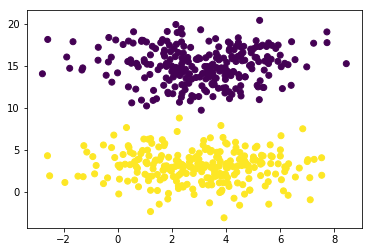

In [290]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [291]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

In [292]:
decision_tree = DecisionTree(FunctionSelection.cross_entropy, 2, 2)
decision_tree.train(X_train, X_test)

DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f321801ee18>, leaf_count=2, max_depth=2, sepr=50)

In [293]:
decision_tree.score(y_train, y_test)

1.0

Test on **IRIS**.

In [370]:
from sklearn.datasets import load_iris

iris = load_iris()

X_travel, y_train, t_travel, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, 
                                                    random_state=123)

X_train, v_train, X_test, v_test = train_test_split(X_travel, t_travel,
                                                    test_size=0.2,
                                                    random_state=123)

In [375]:
possible_params = list(it.product([3, 4, 5], [2, 3, 4, 5]))
params = [{'max_depth': x, 'leaf_count': y} for x, y in possible_params]
params[:5]

[{'max_depth': 3, 'leaf_count': 2},
 {'max_depth': 3, 'leaf_count': 3},
 {'max_depth': 3, 'leaf_count': 4},
 {'max_depth': 3, 'leaf_count': 5},
 {'max_depth': 4, 'leaf_count': 2}]

In [372]:
best_model, best_score = grid_search(DecisionTree, 
                                     FunctionSelection.cross_entropy, 
                                     params, X_train, X_test)

In [373]:
best_model, best_score

(DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f3218fe0ea0>, leaf_count=2, max_depth=4, sepr=50),
 0.8947368421052632)

In [374]:
best_model.score(y_train, y_test)

0.9333333333333333

Generate non linearly separately **dataset**.

In [492]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(mean=(10, 10), cov=0.5, n_samples=1000, n_classes=2, random_state=145)

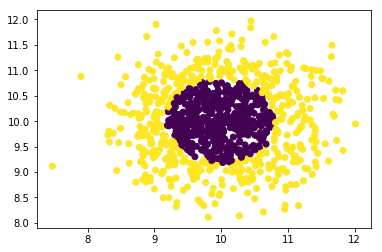

In [493]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [494]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=126)

In [495]:
decision_tree = DecisionTree(FunctionSelection.cross_entropy, max_depth=8, leaf_count=6)
decision_tree.train(X_train, X_test)

DecisionTree(entropy=<function FunctionSelection.cross_entropy at 0x7f3212b12e18>, leaf_count=6, max_depth=8, sepr=50)

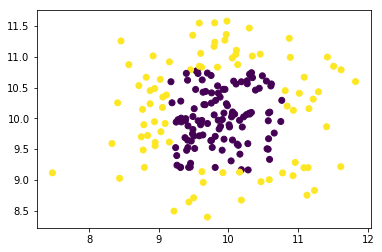

In [496]:
pred = decision_tree.predict(y_train)

# what the model learned
plt.scatter(y_train[:, 0], y_train[:, 1], c=pred);

In [497]:
# this score is dependent on generated data for the implemented model, 
# it goes from 80-95% accuracy
decision_tree.score(y_train, y_test)

0.89

Test the same data on **RandomForest**.

In [352]:
possible_params = list(it.product([12], [4, 5], [2, 3, 4]))
params = [{'n_trees': x, 'max_depth': y, 'leaf_count': z} for x, y, z in possible_params]
params[:5]

[{'n_trees': 12, 'max_depth': 4, 'leaf_count': 2},
 {'n_trees': 12, 'max_depth': 4, 'leaf_count': 3},
 {'n_trees': 12, 'max_depth': 4, 'leaf_count': 4},
 {'n_trees': 12, 'max_depth': 5, 'leaf_count': 2},
 {'n_trees': 12, 'max_depth': 5, 'leaf_count': 3}]

In [353]:
best_model, best_score = grid_search(RandomForest, 
                                     'cross-entropy', 
                                     params, X_train, X_test)

In [354]:
best_model, best_score

(RandomForest(n_trees=12, max_depth=4, leaf_count=4, entropy='cross-entropy'),
 0.5714285714285714)

In [355]:
best_model.score(y_train, y_test)

0.6266666666666667

Train **RandomForest** with other parameters.

In [524]:
random_forest = RandomForest(50)
random_forest.train(X_train, X_test)

RandomForest(n_trees=50, max_depth=6, leaf_count=5, entropy='cross-entropy')

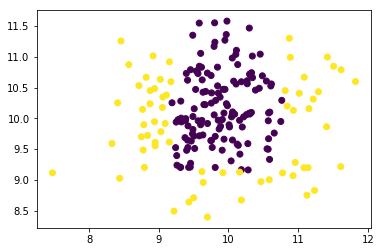

In [525]:
pred = random_forest.predict(y_train)

# what the model learned
plt.scatter(y_train[:, 0], y_train[:, 1], c=pred);

In [526]:
random_forest.score(y_train, y_test)

0.795